# Overview Performance

In [1]:
import pandas as pd
import numpy as np
import datetime

## Import Data Source

In [17]:
# data_src = "/Users/ruzlim/Code/Jupyter//Raw_Agg_Performance.csv"
# data_src = "c/Users/Narut4/coding/Jupyter/Raw_Agg_Performance.csv"

data_src = "Raw-Agg Perf_Wk 2023021.csv"
df = pd.read_csv(data_src)
# df.head()
df.CENTER.unique()

array(['Digitalization', 'Network Experience', 'New S-Curve',
       'Customer Service Experience & Retention', 'Sales & Revenue'],
      dtype=object)

## Analyze Data

In [3]:
df.shape

(7168, 18)

In [ ]:
df.dtypes

In [ ]:
df.describe()

In [ ]:
df.mean(numeric_only=True)

In [ ]:
# Check null value in each column

df.apply(lambda x: sum(x.isnull()), axis=0)

In [ ]:
# Fullfill null value example

# df_tmp = df

# df_tmp['TARGET_AGG'].fillna(df_tmp['TARGET_AGG'].mean(), inplace=True)

# df_tmp.apply(lambda x: sum(x.isnull()), axis=0)

# df_tmp

In [ ]:
# df['CENTER'].unique()
# df['PRODUCT_GRP'].unique()
df['METRIC_GRP'].unique()
# df['METRIC_CD'].unique()
# df['METRIC_NAME'].unique()

# df.loc[:, ['METRIC_CD', 'METRIC_NAME']]

# df_bg_agg_actual_mth = pd.DataFrame(df_bg.groupby(['TM_KEY_MTH', 'METRIC_CD', 'METRIC_NAME'])['ACTUAL_AGG'].sum().reset_index())

# columns = ['Date','Fee']
# df2 = df[columns].groupby(df['Courses']).nunique() 

# df_grp = df.loc[:, ['METRIC_CD', 'METRIC_NAME']].groupby
# df_grp = df.groupby(['METRIC_CD', 'METRIC_NAME']).value_counts()
# df_grp = df.groupby(['METRIC_CD', 'METRIC_NAME']).transform('count')
# df_grp = df.groupby(['METRIC_CD', 'METRIC_NAME']).sum(1)
# df_grp = df[['METRIC_CD', 'METRIC_NAME']].groupby(df['METRIC_CD']).nunique()

# df_grp

## Business Growth

In [3]:
# df_bg = df[(df['CENTER'] == 'Sales & Revenue') & (df['BG_FLAG'] == 'Y')]
df_bg = df[(df['BG_FLAG'] == 'Y') | ('METRIC_NAME' == 'TDG Revenue (Performance View)')]
df_bg.head()

,TM_KEY_MTH,TM_KEY_WK,CENTER,METRIC_GRP,COMP_CD,PRODUCT_GRP,METRIC_CD,METRIC_NAME,DIMENSION_KPI_FLAG,BG_FLAG,AGG_TYPE,RR_IND,GRY_IND,UOM,PERIOD,ACTUAL_AGG,TARGET_AGG,PPN_TM
408,202303,2023010,Sales & Revenue,Revenue,ALL,Postpaid,B2R000100,Postpaid Revenue,Y,Y,S,0,GYR,baht,M,2.542705e+09,2.560220e+09,2023-05-26 09:56:03
409,202304,2023014,Sales & Revenue,Revenue,ALL,Postpaid,B2R000100,Postpaid Revenue,Y,Y,S,0,GYR,baht,M,1.796362e+09,1.824547e+09,2023-05-26 09:56:03
410,202305,2023019,Sales & Revenue,Revenue,ALL,Postpaid,B2R000100,Postpaid Revenue,Y,Y,S,0,GYR,baht,M,3.148715e+09,3.154019e+09,2023-05-26 09:56:03
622,202303,2023009,Sales & Revenue,Revenue,ALL,Prepaid,B1R000100,Prepaid Revenue,Y,Y,S,1,GYR,baht,M,6.699010e+08,6.262193e+08,2023-05-26 09:56:03
623,202304,2023014,Sales & Revenue,Revenue,ALL,Prepaid,B1R000100,Prepaid Revenue,Y,Y,S,1,GYR,baht,M,1.119646e+09,1.122306e+09,2023-05-26 09:56:03


In [4]:
df_bg.shape

(70, 18)

In [ ]:
df_bg.describe()

In [ ]:
# df_bg.sort_values(by=['TM_KEY_MTH', 'TM_KEY_WK', 'CENTER', 'METRIC_GRP', 'COMP_CD', 'PRODUCT_GRP', 'METRIC_CD'], ascending=True)
# df_bg.head()

## Monthly Aggregate

In [ ]:
df_bg_agg_actual_mth = pd.DataFrame(df_bg.groupby(['TM_KEY_MTH', 'METRIC_CD', 'METRIC_NAME'])['ACTUAL_AGG'].sum().reset_index())
df_bg_agg_actual_mth.rename(columns={'ACTUAL_AGG': 'AGG'}, inplace=True)
df_bg_agg_actual_mth['MEASURE'] = 'ACTUAL'
# df_bg_agg_actual_mth.head()

df_bg_agg_target_mth = pd.DataFrame(df_bg.groupby(['TM_KEY_MTH', 'METRIC_CD', 'METRIC_NAME'])['TARGET_AGG'].sum().reset_index())
df_bg_agg_target_mth.rename(columns={'TARGET_AGG': 'AGG'}, inplace=True)
df_bg_agg_target_mth['MEASURE'] = 'TARGET'
# df_bg_agg_target_mth.head()

df_bg_agg_mth = pd.concat([df_bg_agg_actual_mth, df_bg_agg_target_mth])
df_bg_agg_mth['AGG'] = df_bg_agg_mth['AGG'] / 1000000
df_bg_agg_mth.head()

In [ ]:
df_bg_agg_mth_pivot = df_bg_agg_mth.pivot(index=['TM_KEY_MTH', 'MEASURE'], columns=['METRIC_CD', 'METRIC_NAME'], values='AGG')
df_bg_agg_mth_pivot

In [ ]:
df_bg_agg_mth_pivot.T.round(2)

## Weekly Aggregate

In [ ]:
df_bg_agg_actual_wk = pd.DataFrame(df_bg.groupby(['TM_KEY_WK', 'METRIC_CD', 'METRIC_NAME'])['ACTUAL_AGG'].sum().reset_index())
df_bg_agg_actual_wk.rename(columns={'ACTUAL_AGG': 'AGG'}, inplace=True)
df_bg_agg_actual_wk['MEASURE'] = 'ACTUAL'
# df_bg_agg_actual_wk.head()

df_bg_agg_target_wk = pd.DataFrame(df_bg.groupby(['TM_KEY_WK', 'METRIC_CD', 'METRIC_NAME'])['TARGET_AGG'].sum().reset_index())
df_bg_agg_target_wk.rename(columns={'TARGET_AGG': 'AGG'}, inplace=True)
df_bg_agg_target_wk['MEASURE'] = 'TARGET'
# df_bg_agg_target_wk.head()

df_bg_agg_wk = pd.concat([df_bg_agg_actual_wk, df_bg_agg_target_wk])
df_bg_agg_wk['AGG'] = df_bg_agg_wk['AGG'] / 1000000
df_bg_agg_wk.head()

In [ ]:
df_bg_agg_wk_pivot = df_bg_agg_wk.pivot(index=['TM_KEY_WK', 'MEASURE'], columns=['METRIC_CD', 'METRIC_NAME'], values='AGG')
df_bg_agg_wk_pivot

In [10]:
output_data = df_bg_agg_wk_pivot.T
output_data.round(2)

TM_KEY_WK                                  2023009           2023010            
MEASURE                                     ACTUAL   TARGET   ACTUAL   TARGET   
METRIC_CD  METRIC_NAME                                                          
B1R000100  Prepaid Revenue                  669.90   626.22  1489.02  1464.92  \
B2R000100  Postpaid Revenue                1157.23  1165.61  2542.70  2560.22   
TB3R000100 TOL Revenue                      189.71   205.17   495.35   531.75   
TB4R000100 TVS Revenue                       42.43    47.56    90.13   100.81   
TNSC00142  TDG Revenue (Performance View)     0.00     0.00   572.77   522.00   

TM_KEY_WK                                  2023011           2023012            
MEASURE                                     ACTUAL   TARGET   ACTUAL   TARGET   
METRIC_CD  METRIC_NAME                                                          
B1R000100  Prepaid Revenue                 2265.82  2281.46  3055.20  3090.84  \
B2R000100  Postpaid Revenue                4320.11  4365.50  5690.43  5739.95   
TB3R000100 TOL Revenue                      952.87  1020.47  1246.04  1332.36   
TB4R000100 TVS Revenue                      171.66   191.37   223.40   249.18   
TNSC00142  TDG Revenue (Performance View)   572.77   522.00   572.77   522.00   

TM_KEY_WK                                  2023013           ...  2023017   
MEASURE                                     ACTUAL   TARGET  ...   ACTUAL   
METRIC_CD  METRIC_NAME                                       ...            
B1R000100  Prepaid Revenue                 3957.43  3952.69  ...  3584.68  \
B2R000100  Postpaid Revenue                7480.29  7566.68  ...  6654.11   
TB3R000100 TOL Revenue                     1594.48  1704.09  ...  1405.52   
TB4R000100 TVS Revenue                      314.92   461.17  ...   273.70   
TNSC00142  TDG Revenue (Performance View)   572.77   522.00  ...   538.00   

TM_KEY_WK                                           2023018           2023019   
MEASURE                                     TARGET   ACTUAL   TARGET   ACTUAL   
METRIC_CD  METRIC_NAME                                                          
B1R000100  Prepaid Revenue                 3639.38   881.98   869.30  1696.81  \
B2R000100  Postpaid Revenue                6672.69  1598.82  1601.33  3148.72   
TB3R000100 TOL Revenue                     1506.83   302.04   317.30   665.13   
TB4R000100 TVS Revenue                      413.62    32.42    59.56    64.69   
TNSC00142  TDG Revenue (Performance View)   535.00   561.00   503.00   561.00   

TM_KEY_WK                                           2023020           2023021   
MEASURE                                     TARGET   ACTUAL   TARGET   ACTUAL   
METRIC_CD  METRIC_NAME                                                          
B1R000100  Prepaid Revenue                 1696.02  2506.47  2522.06  2623.56  \
B2R000100  Postpaid Revenue                3154.02  4513.73  4526.16  4950.01   
TB3R000100 TOL Revenue                      702.80   971.71  1032.97  1120.31   
TB4R000100 TVS Revenue                      131.08    94.19   191.37    94.19   
TNSC00142  TDG Revenue (Performance View)   503.00   561.00   503.00   561.00   

TM_KEY_WK                                           
MEASURE                                     TARGET  
METRIC_CD  METRIC_NAME                              
B1R000100  Prepaid Revenue                 2639.83  
B2R000100  Postpaid Revenue                4981.00  
TB3R000100 TOL Revenue                     1191.07  
TB4R000100 TVS Revenue                      191.37  
TNSC00142  TDG Revenue (Performance View)   503.00  

[5 rows x 26 columns]

## Generate Output File

In [9]:
output_file = data_src.replace("Raw-Agg", "BG").replace(".csv", ".xlsx")

output_data.to_excel(output_file)

print(f'\n"{output_file}" is generated')


"BG Perf_Wk 2023021.xlsx" is generated


## Visualization
##### https://matplotlib.org/stable/tutorials/introductory/pyplot.html

In [11]:
import matplotlib.pyplot as plt

In [12]:
# df_bg_agg_1 = pd.DataFrame(df_bg.groupby(['TM_KEY_MTH', 'TM_KEY_WK', 'METRIC_CD', 'METRIC_NAME'])['ACTUAL_AGG'].sum().reset_index())
# df_bg_agg_1

# df_bg_agg_2 = pd.DataFrame(df_bg.groupby(['TM_KEY_MTH', 'TM_KEY_WK', 'METRIC_CD', 'METRIC_NAME'])['ACTUAL_AGG'].agg(['sum', 'count']).reset_index())
# df_bg_agg_2

df_bg_agg = pd.DataFrame(df_bg.groupby(['TM_KEY_MTH', 'TM_KEY_WK', 'METRIC_CD', 'METRIC_NAME']).agg({'ACTUAL_AGG': 'sum', 'TARGET_AGG': 'sum'}).reset_index())
df_bg_agg['ACTUAL_AGG'] = df_bg_agg['ACTUAL_AGG'] / 1000000
df_bg_agg['TARGET_AGG'] = df_bg_agg['TARGET_AGG'] / 1000000
df_bg_agg.head()

,TM_KEY_MTH,TM_KEY_WK,METRIC_CD,METRIC_NAME,ACTUAL_AGG,TARGET_AGG
0,202303,2023009,B1R000100,Prepaid Revenue,669.901008,626.219335
1,202303,2023009,B2R000100,Postpaid Revenue,1157.226110,1165.611851
2,202303,2023009,TB3R000100,TOL Revenue,189.713166,205.173356
3,202303,2023009,TB4R000100,TVS Revenue,42.430646,47.555946
4,202303,2023009,TNSC00142,TDG Revenue (Performance View),0.000000,0.000000


## Bar Chart by month

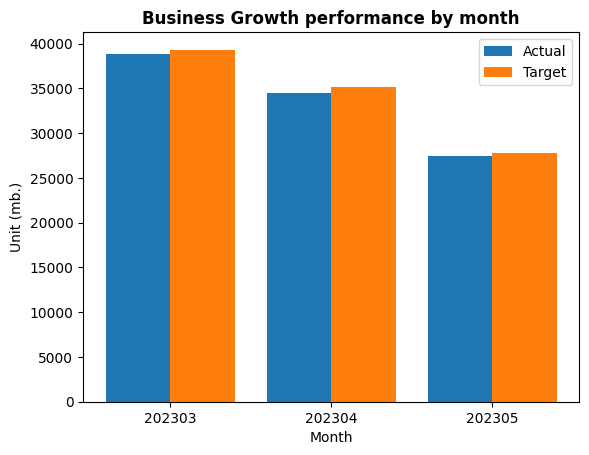

In [13]:
# df_bg_chart_mth = df_bg_agg.groupby('TM_KEY_MTH').sum(numeric_only=True).round(2)
# df_bg_chart_mth

x = df_bg_agg['TM_KEY_MTH'].unique()
x_axis = np.arange(len(x))
y_act = df_bg_agg.groupby('TM_KEY_MTH')['ACTUAL_AGG'].sum().round(2)
y_tgt = df_bg_agg.groupby('TM_KEY_MTH')['TARGET_AGG'].sum().round(2)

# plt.figure(figsize=(12,6))

plt.bar(x_axis - 0.2, y_act, 0.4, label='Actual')
plt.bar(x_axis + 0.2, y_tgt, 0.4, label='Target')

plt.xticks(x_axis, x)
# plt.xticks(x, rotation='vertical')
# plt.xticks(x_axis, x, rotation='horizontal')
plt.xlabel('Month')
plt.ylabel('Unit (mb.)')
plt.title('Business Growth performance by month', fontdict={'fontweight': 'bold'})
plt.legend()
plt.show()

## Bar Chart by week

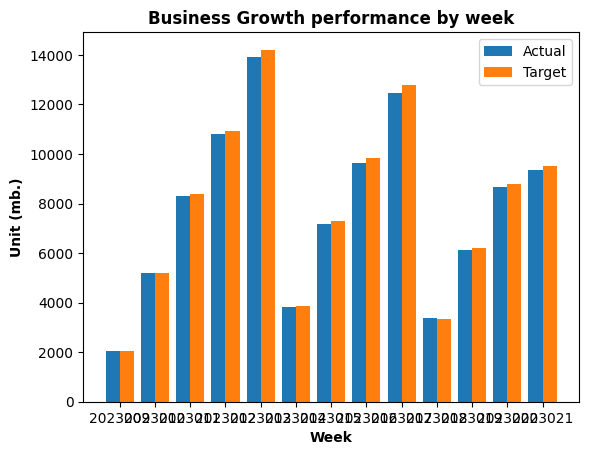

In [14]:
# df_bg_chart_wk = df_bg_agg.groupby('TM_KEY_WK').sum(numeric_only=True).round(2)
# df_bg_chart_wk

x = df_bg_agg['TM_KEY_WK'].unique()
x_axis = np.arange(len(x))
y_act = df_bg_agg.groupby('TM_KEY_WK')['ACTUAL_AGG'].sum().round(2)
y_tgt = df_bg_agg.groupby('TM_KEY_WK')['TARGET_AGG'].sum().round(2)

# plt.figure(figsize=(18,6))

# plt.bar(x_axis, y_act)
plt.bar(x_axis - 0.2, y_act, 0.4, label='Actual')
plt.bar(x_axis + 0.2, y_tgt, 0.4, label='Target')

plt.xticks(x_axis, x)
plt.xlabel('Week', fontdict={'fontweight': 'bold'})
plt.ylabel('Unit (mb.)', fontdict={'fontweight': 'bold'})
plt.title('Business Growth performance by week', fontdict={'fontweight': 'bold'})
plt.legend()
plt.show()

## Plot Chart by week

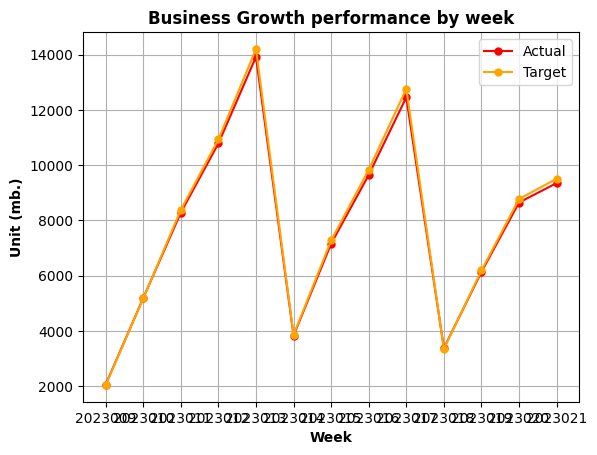

In [15]:
x = df_bg_agg['TM_KEY_WK'].unique()
x_axis = np.arange(len(x))
y_act = df_bg_agg.groupby('TM_KEY_WK')['ACTUAL_AGG'].sum().round(2)
y_tgt = df_bg_agg.groupby('TM_KEY_WK')['TARGET_AGG'].sum().round(2)

# plt.figure(figsize=(18,6))

# plt.plot(x_axis, y_act, marker='.', markeredgewidth=3, markeredgecolor='red')
plt.plot(x_axis, y_act, marker='.', markeredgewidth=3, label='Actual', color='red')
plt.plot(x_axis, y_tgt, marker='.', markeredgewidth=3, label='Target', color='orange')
plt.grid()

# plt.xticks(x_axis, rotation='horizontal')
plt.xticks(x_axis, x)
plt.xlabel('Week', fontdict={'fontweight': 'bold'})
plt.ylabel('Unit (mb.)', fontdict={'fontweight': 'bold'})
plt.title('Business Growth performance by week', fontdict={'fontweight': 'bold'})
plt.legend()
plt.show()  